# Example 1:
# Gaussian Source ($\sigma = 1\mathrm{"}$) + Gaussian PSF (PSF$(t)$: FWHM $\sim 0.75{''} \rightarrow 1.0{''}$, $\sim 1.0{''} \rightarrow 0.75{''}$)

In [1]:
! eups list -s | grep lsst_distrib

lsst_distrib          gdf42428520+4e9f6d16c8 	current w_2023_27 setup


In [2]:
import glob
import galsim
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from astropy.table import Table, vstack
from psfxt import *

def read_pkl(f):
    
    # Open dict
    d = dict()
    with open(f, 'rb') as f:
        d = pkl.load(f)
    
    # Delete unnecessary keys 
    # to save space
    #del d['image_mean']
    
    # Format for vstack
    for key in d.keys():
        d[key] = [d[key]]

    return d

## Simulation of Gaussian Source + Gaussian PSF

Simulation parameters:

    params['niter'] = 1000 # Number of images to simulate at each 
    params['imsize'] = (25,25)
    params['source_sigma'] = 4.5
    params['bf_strength'] = 1.0
    params['diffusion_factor'] = 1.0
    params['nrecalc'] = 100
    params['nsteps'] = 5
    params['t0'] = 0.
    params['tf'] = 15.



In [3]:
# Load in the data for each simulation
data = np.sort(np.asarray(glob.glob("./output/*[1-8].pkl")))
N = int(len(data) / 2.)

data = np.fliplr(data.reshape((2,N)).T)
print(data)

# Store the simulated data
cols = ('peak', 'peak_err', 'ixx','iyy','ixy','ixx_err','iyy_err','ixy_err')
cols_types = ('f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4')
small2large_data = Table(names=cols, dtype=cols_types)
large2small_data = Table(names=cols, dtype=cols_types)

for i, d in enumerate(data):
    small2large_output = read_pkl(d[0]) 
    large2small_output = read_pkl(d[1])
    
    small2large_data = vstack([small2large_data, Table(small2large_output)])
    large2small_data = vstack([large2small_data, Table(large2small_output)])
    


[['./output/small2large-process-1.pkl'
  './output/large2small-process-1.pkl']
 ['./output/small2large-process-2.pkl'
  './output/large2small-process-2.pkl']
 ['./output/small2large-process-3.pkl'
  './output/large2small-process-3.pkl']
 ['./output/small2large-process-4.pkl'
  './output/large2small-process-4.pkl']
 ['./output/small2large-process-5.pkl'
  './output/large2small-process-5.pkl']
 ['./output/small2large-process-6.pkl'
  './output/large2small-process-6.pkl']
 ['./output/small2large-process-7.pkl'
  './output/large2small-process-7.pkl']
 ['./output/small2large-process-8.pkl'
  './output/large2small-process-8.pkl']]


Text(0, 0.5, '$I_{xx}$ [px$^2$]')

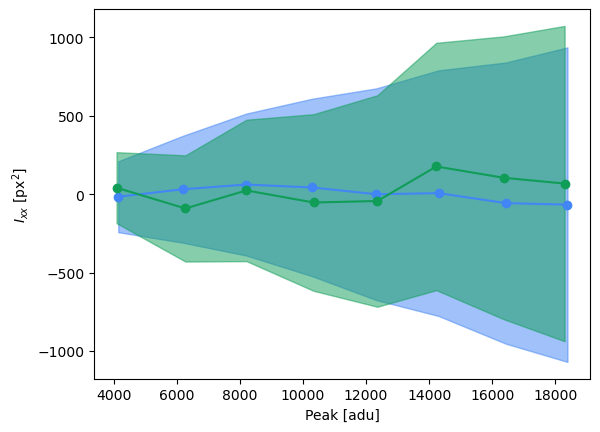

In [10]:
plt.plot(small2large_data['peak'], small2large_data['ixx'] - small2large_data['peak'], "o-", color="#4285F4", label="$\sim 0.75{''} \rightarrow 1.0{''}$")
plt.fill_between(small2large_data['peak'], y1 = small2large_data['ixx']- small2large_data['peak']-small2large_data['ixx_err'], y2 = small2large_data['ixx']  - small2large_data['peak'] + small2large_data['ixx_err'], color="#4285F4", alpha=0.5)
#plt.fill_betweenx(small2large_data['ixx'], x1 = small2large_data['peak']-small2large_data['peak_err'], x2 = small2large_data['peak'] + small2large_data['peak_err'], color="#4285F4", alpha=0.5)

plt.plot(large2small_data['peak'], large2small_data['ixx'] - large2small_data['peak'], "o-", color="#0F9D58", label="$\sim 1.0{''} \rightarrow 0.75{''}$")
plt.fill_between(large2small_data['peak'], y1 = large2small_data['ixx']- large2small_data['peak']-large2small_data['ixx_err'], y2 = large2small_data['ixx']- large2small_data['peak'] + large2small_data['ixx_err'], color="#0F9D58", alpha=0.5)
#plt.fill_betweenx(large2small_data['ixx'], x1 = large2small_data['peak']-large2small_data['peak_err'], x2 = large2small_data['peak'] + large2small_data['peak_err'], color="#0F9D58", alpha=0.5)


plt.xlabel("Peak [adu]")
plt.ylabel("$I_{xx}$ [px$^2$]")



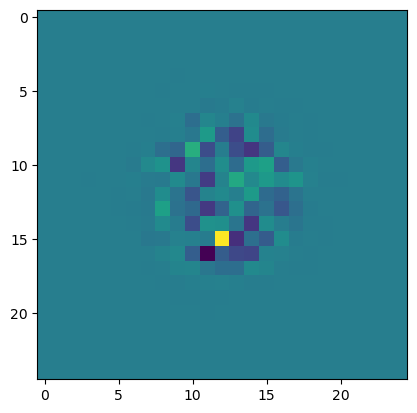

In [65]:
diff = small2large_data['image_mean'][0] - large2small_data['image_mean'][0]
plt.imshow(diff)

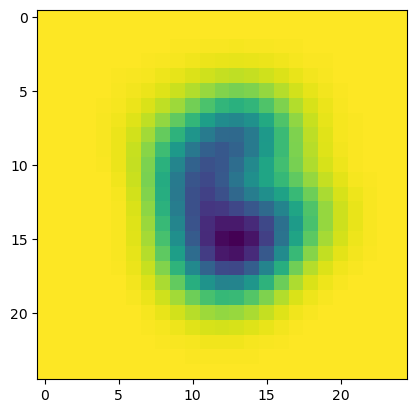

In [67]:
diff = gaussian_filter(diff,2)
plt.imshow(diff)